# <center><span style='background:yellow'> Réalisez une application de recommandation de contenu</span></center>
# <center><span style='background:yellow'>Exploration et transformation des données</span></center>

## **Sommaire**
1. Chargement de données  
2. Exploration des données
  - Contenu
  - Exploration du fichier 'articles_metadata.csv'
  - Exploration du fichier 'clicks_sample.csv'
  - All clicks
  - Exploration du fichier 'articles_embeddings.pickle'

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## 1. Chargement de données<a class="anchor" id="1"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
data_path = "/content/drive/MyDrive/projet9/data/news-portal-user-interactions-by-globocom/"
figure_path = "/content/drive/MyDrive/projet9/figures/"

In [ ]:
import os
os.listdir(data_path)

['articles_metadata.csv',
 'clicks_sample.csv',
 'articles_embeddings.pickle',
 'clicks']

In [ ]:
ss_path = data_path + 'clicks'

In [ ]:
os.listdir(ss_path)

['clicks']

In [ ]:
clicks_path = ss_path + '/clicks/'
clicks_dir = os.listdir(clicks_path)

In [ ]:
len(clicks_dir)

385

In [ ]:
ss_path1 = data_path + 'articles_metadata.csv'
ss_path2 = data_path + 'clicks_sample.csv'
ss_path3 = data_path + 'articles_embeddings.pickle'

In [ ]:
clicks_dir[0]

'clicks_hour_009.csv'

In [ ]:
articles_meta = pd.read_csv(ss_path1)
clisks_sample = pd.read_csv(ss_path2)
articles_embeddings = pd.read_pickle(ss_path3) 

## 2. Exploration des données<a class="anchor" id="2"></a>

### Contenu

L'ensemble de données contient un échantillon d'interactions d'utilisateurs (pages vues) sur le portail d'actualités du 1er au 16 octobre 2017, comprenant environ 3 millions de clics, répartis sur plus d'un million de sessions de la part de 314 000 utilisateurs qui ont lu plus de 46 000 articles d'actualité différents pendant cette période.  
Il est composé de trois fichiers/dossiers :  
> **clicks** - Dossier avec des fichiers CSV (un par heure), contenant les interactions des sessions utilisateur dans le portail d'actualité. 

> **articles_metadata.csv** - Fichier CSV avec des informations de métadonnées sur tous les (364047) articles publiés  

> **articles_embeddings.pickle** Pickle (Python 3) d'une matrice NumPy contenant les incorporations de contenu d'article (vecteurs de 250 dimensions), formées sur le texte et les métadonnées des articles.

###Exploration du fichier 'articles_metadata.csv'

Ce fichier contient les informations sur les articles publiés

In [ ]:
articles_meta.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [ ]:
articles_meta.shape

(364047, 5)

In [ ]:
articles_meta.columns

Index(['article_id', 'category_id', 'created_at_ts', 'publisher_id',
       'words_count'],
      dtype='object')

In [ ]:
articles_meta.describe()

,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000


#### La variable **"article_id**

In [ ]:
articles_meta["article_id"].nunique()

364047

#### La variable **"category_id**

In [ ]:
articles_meta["category_id"].nunique()

461

In [ ]:
articles_meta["category_id"].value_counts()

281    12817
375    10005
399     9049
412     8648
431     7759
       ...  
341        1
121        1
335        1
131        1
0          1
Name: category_id, Length: 461, dtype: int64

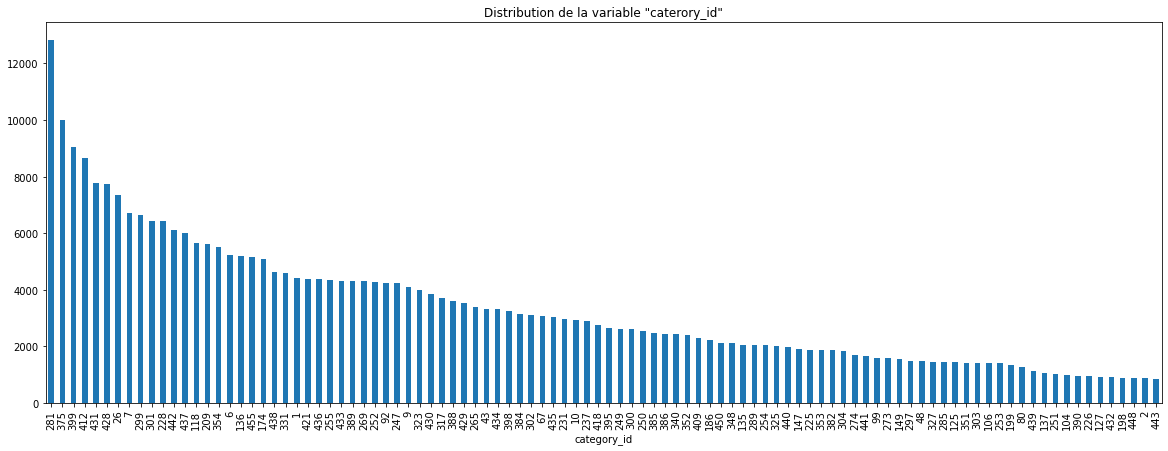

In [ ]:
fig = plt.figure(figsize=(20,7))
articles_meta["category_id"].value_counts()[:100].plot.bar()
plt.title("Distribution de la variable \"caterory_id\"")
plt.xlabel("category_id")
fig.savefig(figure_path + 'category_id.png')
plt.show()

In [ ]:
len(articles_meta["category_id"].unique())

461

#### La variable **"created_at_ts"**

In [ ]:
articles_meta["created_at_ts"] = pd.to_datetime(articles_meta["created_at_ts"], unit='ms')
articles_meta["created_at_ts"]

0        2017-12-13 05:53:39
1        2014-07-14 12:45:36
2        2014-08-22 00:35:06
3        2014-08-19 17:11:53
4        2014-08-03 13:06:11
                 ...        
364042   2015-06-11 14:48:38
364043   2015-06-12 22:34:32
364044   2016-03-14 16:51:19
364045   2018-01-14 21:18:57
364046   2017-09-19 08:55:30
Name: created_at_ts, Length: 364047, dtype: datetime64[ns]

In [ ]:
articles_meta["created_at_ts"].describe(datetime_is_numeric=True)

count                           364047
mean     2016-09-16 23:57:17.328421888
min                2006-09-27 11:14:35
25%         2015-10-15 16:00:43.500000
50%                2017-03-13 16:27:29
75%                2017-11-05 14:09:11
max                2018-03-13 12:12:30
Name: created_at_ts, dtype: object

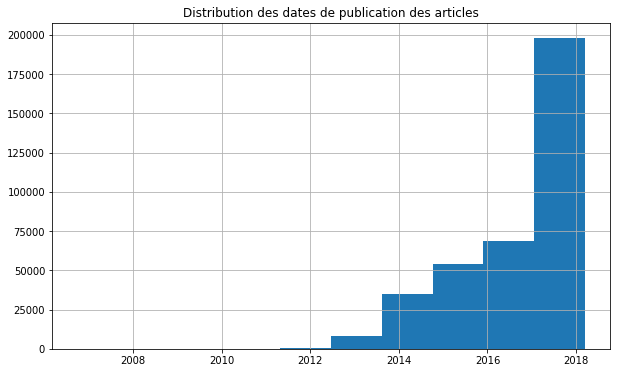

In [ ]:
fig = plt.figure(figsize=(10,6))
articles_meta["created_at_ts"].hist()
plt.title('Distribution des dates de publication des articles')
fig.savefig(figure_path + 'created_at_ts.png')
plt.show()

#### La variable **"publisher_id"**

In [ ]:
articles_meta['publisher_id'].nunique()

1

In [ ]:
articles_meta['publisher_id'].value_counts()

0    364047
Name: publisher_id, dtype: int64

#### La variable **"words_count"**

In [ ]:
articles_meta['words_count'].describe()

count    364047.000000
mean        190.897727
std          59.502766
min           0.000000
25%         159.000000
50%         186.000000
75%         218.000000
max        6690.000000
Name: words_count, dtype: float64

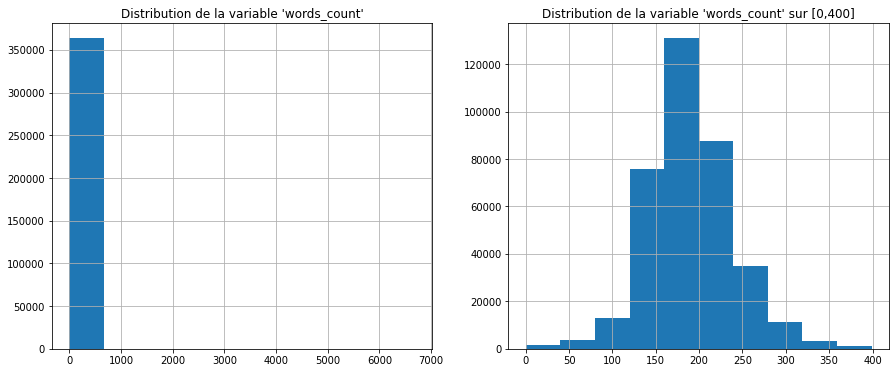

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
articles_meta['words_count'].hist()
plt.title('Distribution de la variable \'words_count\'')
plt.subplot(122)
articles_meta[articles_meta['words_count']<400]['words_count'].hist()
plt.title('Distribution de la variable \'words_count\' sur [0,400]')
fig.savefig(figure_path + 'words_count.png')
plt.show()

#### Résumé

  - On dispose de **364 047** articles
  -Chaque article est décrit par son id de catégorie, sa date de création, son id de publication et le nombre de mots de chaque article.
  - Les articles sont groupés selon **461** catégories
  - Les articles contiennent entre **0** et **6 690** mots et 191 mots en moyenne

### Exploration du fichier 'clicks_sample.csv'

In [ ]:
clisks_sample.shape

(1883, 12)

In [ ]:
clisks_sample.columns

Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type'],
      dtype='object')

In [ ]:
clisks_sample.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,1883.000000,1.883000e+03,1.883000e+03,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,355.893787,1.506828e+15,1.506828e+12,3.459904,176717.848646,1.506830e+12,3.917153,2.305895,12.113648,1.491768,18.774827,1.764206
std,206.162865,8.679628e+08,8.679468e+05,3.037467,82324.177259,1.064938e+07,0.410461,1.062301,7.825735,2.007772,7.083400,1.225679
min,0.000000,1.506825e+15,1.506825e+12,2.000000,2137.000000,1.506827e+12,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,181.500000,1.506827e+15,1.506827e+12,2.000000,108854.000000,1.506828e+12,4.000000,1.000000,2.000000,1.000000,13.000000,1.000000
50%,353.000000,1.506828e+15,1.506828e+12,3.000000,157541.000000,1.506828e+12,4.000000,3.000000,17.000000,1.000000,21.000000,1.000000
75%,537.000000,1.506828e+15,1.506828e+12,4.000000,236697.500000,1.506829e+12,4.000000,3.000000,19.000000,1.000000,25.000000,2.000000
max,706.000000,1.506829e+15,1.506829e+12,24.000000,363291.000000,1.506998e+12,4.000000,4.000000,20.000000,11.000000,28.000000,7.000000


In [ ]:
len(clisks_sample.columns)

12

#### La variable **"user_id"**

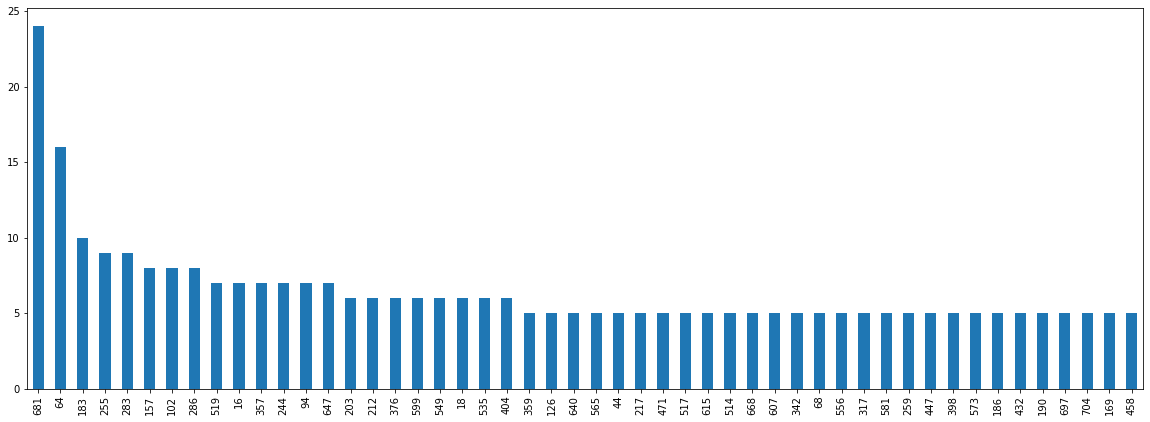

In [ ]:
fig = plt.figure(figsize=(20,7))
clisks_sample["user_id"].value_counts()[:50].plot.bar()
fig.savefig(figure_path + 'user_id.png')
plt.show()

#### La variable **"session_start"**

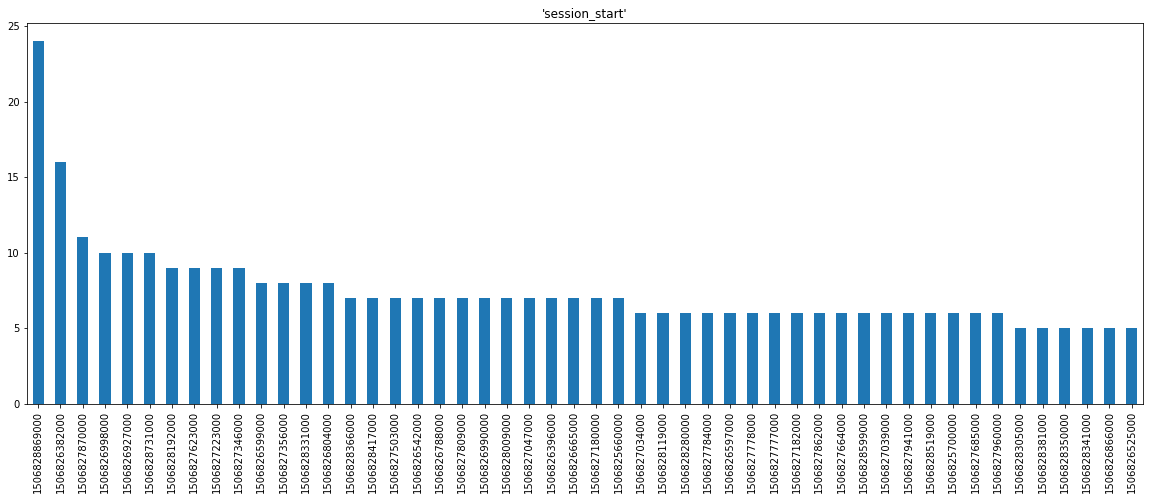

In [ ]:
fig = plt.figure(figsize=(20,7))
clisks_sample["session_start"].value_counts()[:50].plot.bar()
plt.title("\'session_start\'")
fig.savefig(figure_path + 'session_start.png')
plt.show()

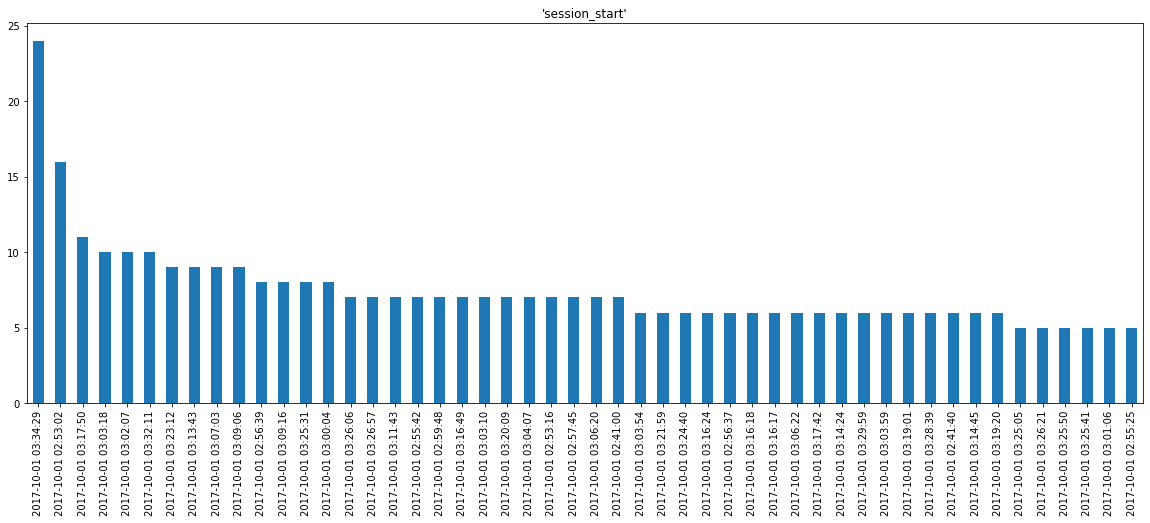

In [ ]:
clisks_sample["session_start_date"] = pd.to_datetime(clisks_sample["session_start"], unit="ms")
plt.figure(figsize=(20,7))
clisks_sample["session_start_date"].value_counts()[:50].plot.bar()
plt.title("\'session_start\'")
fig.savefig(figure_path + 'session_start_date.png')
plt.show()

#### La variable **"session_size"**

In [ ]:
clisks_sample["session_size"].value_counts()

2     904
3     489
4     168
5     140
6      48
7      42
8      24
24     24
9      18
16     16
10     10
Name: session_size, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


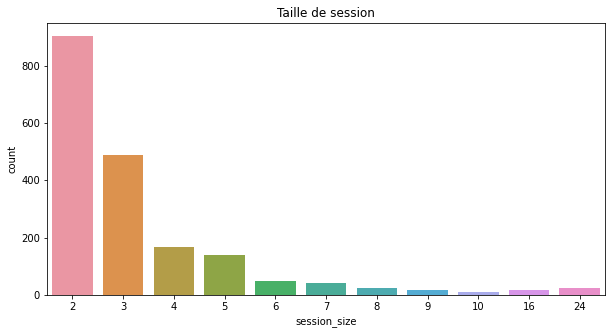

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.countplot(clisks_sample["session_size"])
plt.title("Taille de session")
fig.savefig(figure_path + 'session_size.png')
plt.show()

#### La variable **"click_article_id"**

In [ ]:
var = "click_article_id"
clisks_sample[var].nunique()

323

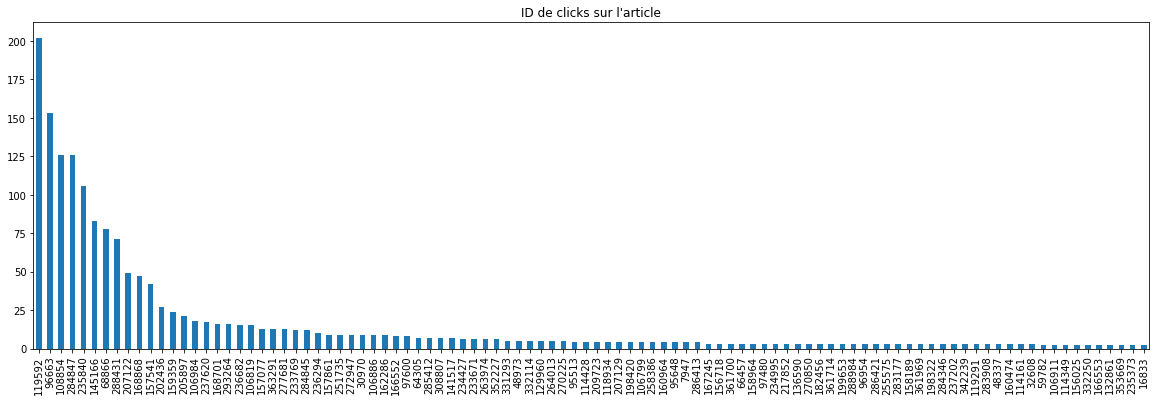

In [ ]:
fig = plt.figure(figsize=(20,6))
clisks_sample[var].value_counts()[:100].plot.bar()
plt.title('ID de clicks sur l\'article')
fig.savefig(figure_path + var + '.png')
plt.show()

#### La variable **"click_timestamp"**

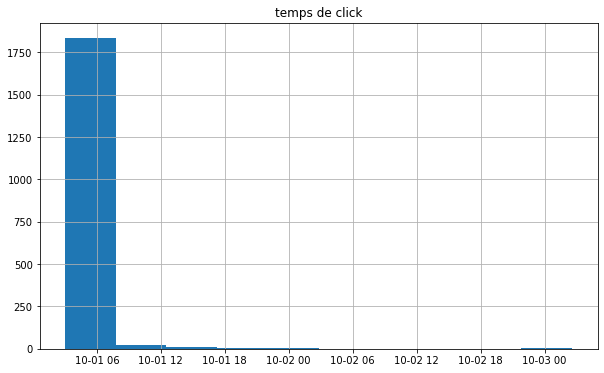

In [ ]:
var = "click_timestamp"
fig = plt.figure(figsize=(10,6))
clisks_sample[var] = pd.to_datetime(clisks_sample[var], unit='ms')
clisks_sample[var].hist()
plt.title('temps de click')
fig.savefig(figure_path + var + '.png')
plt.show()

In [ ]:
clisks_sample[var].describe()

<ipython-input-169-fd36cb7f0a10>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clisks_sample[var].describe()


count                           1883
unique                          1883
top       2017-10-01 03:00:28.020000
freq                               1
first     2017-10-01 03:00:00.026000
last      2017-10-03 02:35:54.157000
Name: click_timestamp, dtype: object

#### La variable **"click_environment"**

In [ ]:
var = "click_environment"
clisks_sample[var].describe()

count    1883.000000
mean        3.917153
std         0.410461
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: click_environment, dtype: float64

In [ ]:
var = "click_environment"
clisks_sample[var].unique()

array([4, 2, 1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


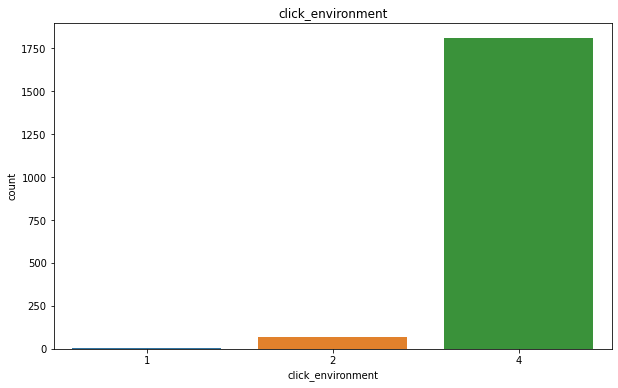

In [ ]:
var = "click_environment"
fig = plt.figure(figsize=(10,6))
sns.countplot(clisks_sample[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

#### La variable **"click_deviceGroup"**

In [ ]:
var = "click_deviceGroup"
clisks_sample[var].describe()

count    1883.000000
mean        2.305895
std         1.062301
min         1.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: click_deviceGroup, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


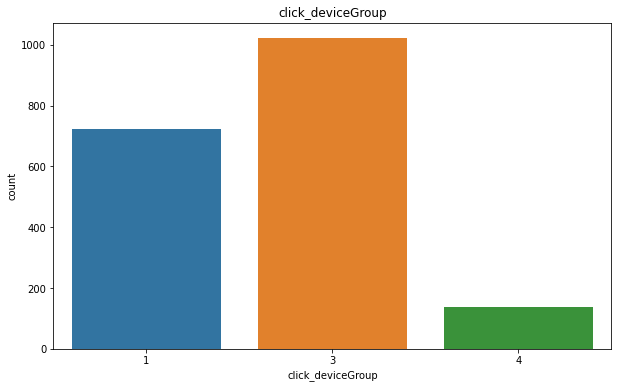

In [ ]:
var = "click_deviceGroup"
fig = plt.figure(figsize=(10,6))
sns.countplot(clisks_sample[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

#### La variable **"click_os"**

In [ ]:
var = "click_os"
clisks_sample[var].unique()

array([20, 17,  2, 12, 13, 19])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


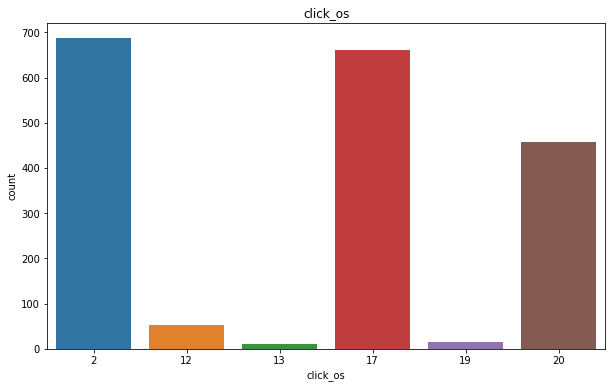

In [ ]:
var = "click_os"
fig = plt.figure(figsize=(10,6))
sns.countplot(clisks_sample[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

#### La variable **"click_country"**

In [ ]:
var = "click_country"
clisks_sample[var].unique()

array([ 1, 11, 10,  8,  2,  4,  7])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


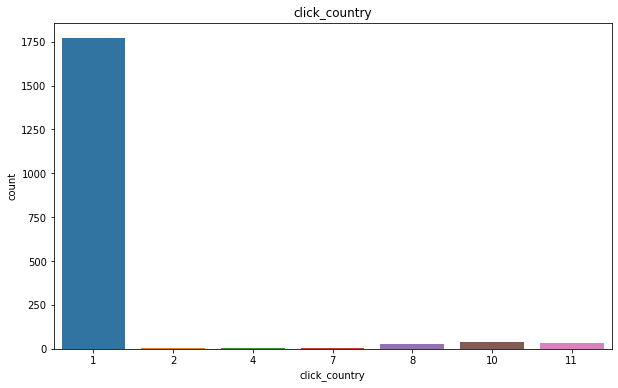

In [ ]:
var = "click_country"
fig = plt.figure(figsize=(10,6))
sns.countplot(clisks_sample[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

#### La variable **"click_region"**

In [ ]:
var = "click_region"
clisks_sample[var].unique()

array([20, 16, 24, 21, 17, 25, 12, 18, 19,  6,  9, 13,  8,  7, 28,  5,  4,
       26, 15, 11, 10, 27,  2,  1, 14, 22])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


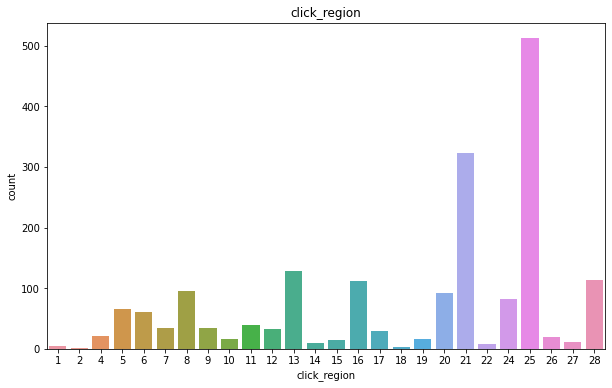

In [ ]:
var = "click_region"
fig = plt.figure(figsize=(10,6))
sns.countplot(clisks_sample[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

#### La variable **"click_referrer_type"**

In [ ]:
var = "click_referrer_type"
clisks_sample[var].unique()

array([2, 1, 5, 7, 6, 4])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


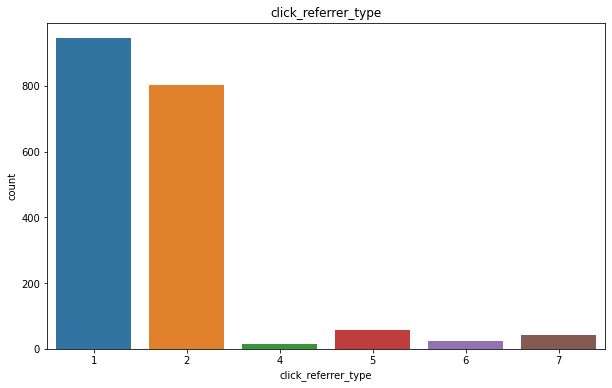

In [ ]:
var = "click_referrer_type"
fig = plt.figure(figsize=(10,6))
sns.countplot(clisks_sample[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

### All clicks

In [ ]:
from tqdm import tqdm
click_file_len = []
all_clicks_df = pd.DataFrame([])
for filename in tqdm(clicks_dir):
  df = pd.read_csv(clicks_path + filename)
  all_clicks_df = pd.concat([all_clicks_df,df])
  click_file_len.append(df.shape[0])

100%|██████████| 385/385 [02:05<00:00,  3.07it/s]


In [ ]:
all_clicks_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,5994,1506857783420821,1506857783000,2,168868,1506857995516,4,3,2,1,13,1
1,5994,1506857783420821,1506857783000,2,119592,1506858025516,4,3,2,1,13,1
2,5995,1506857784325822,1506857784000,2,83576,1506859593943,4,1,17,1,7,1
3,5995,1506857784325822,1506857784000,2,79026,1506859623943,4,1,17,1,7,1
4,5996,1506857791410823,1506857791000,3,338351,1506860155424,4,3,20,1,24,2


In [ ]:
all_clicks_df.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1507554094045,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601


In [ ]:
all_clicks_df.shape

(2988181, 12)

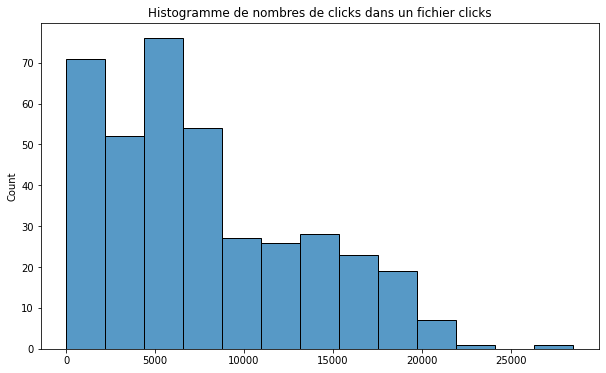

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(click_file_len)
plt.title('Histogramme de nombres de clicks dans un fichier clicks')
fig.savefig(figure_path + 'click_file_size' + '.png')
plt.show()

In [ ]:
all_clicks_df.shape

(2988181, 12)

In [ ]:
all_clicks_df.columns

Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type'],
      dtype='object')

#### La variable **"user_id"**

In [ ]:
var = "user_id"
all_clicks_df[var].nunique()

322897

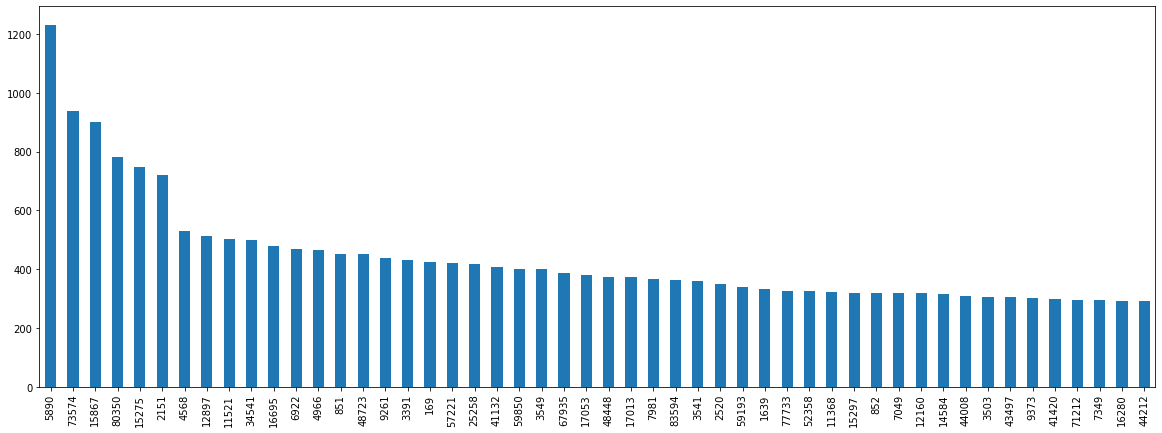

In [ ]:
var = "user_id"
fig = plt.figure(figsize=(20,7))
all_clicks_df[var].value_counts()[:50].plot.bar()
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"session_start"**

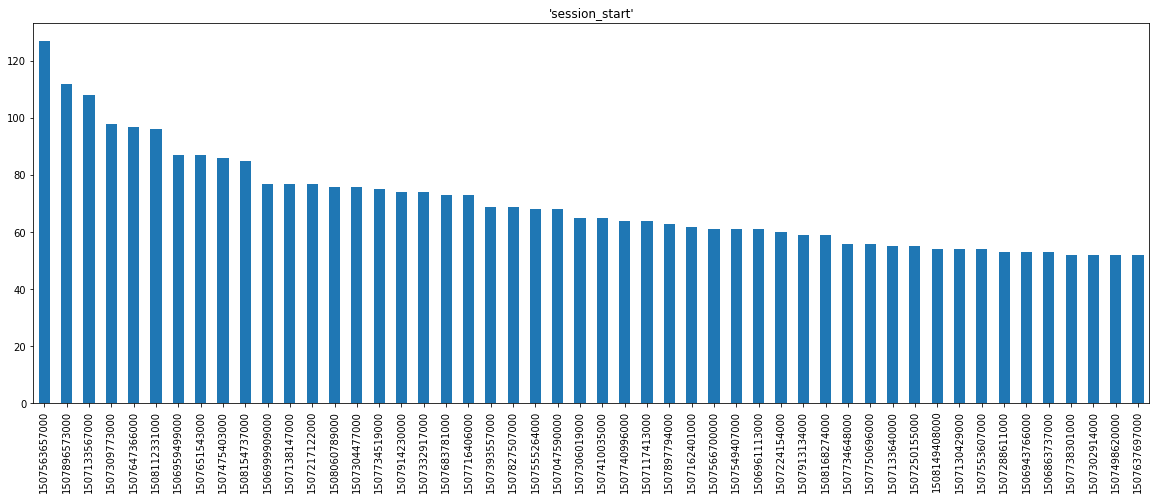

In [ ]:
fig = plt.figure(figsize=(20,7))
all_clicks_df["session_start"].value_counts()[:50].plot.bar()
plt.title("\'session_start\'")
fig.savefig(figure_path + 'session_start_all.png')
plt.show()

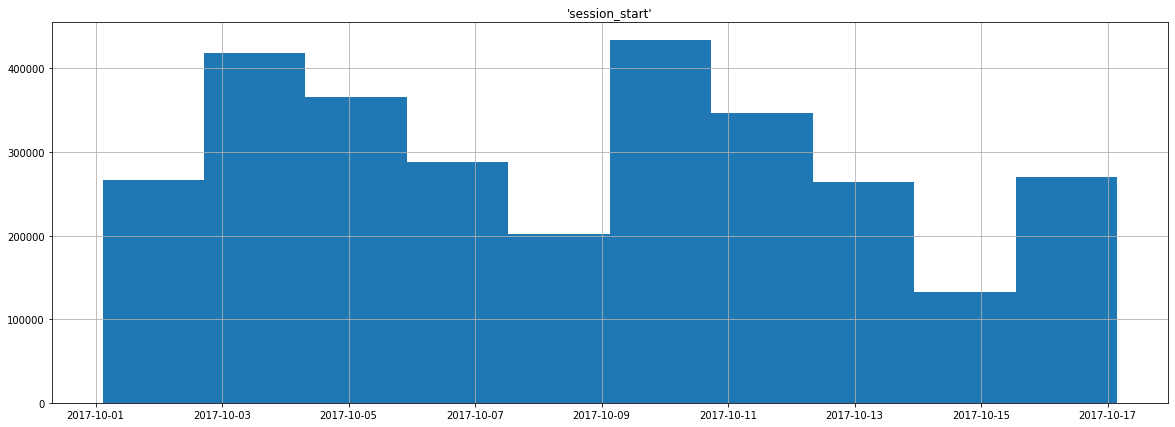

In [ ]:
all_clicks_df["session_start_date"] = pd.to_datetime(all_clicks_df["session_start"], unit="ms")
plt.figure(figsize=(20,7))
all_clicks_df["session_start_date"].hist()
plt.title("\'session_start\'")
fig.savefig(figure_path + 'session_start_date_all.png')
plt.show()

#### La variable **"session_size"**

In [ ]:
all_clicks_df["session_size"].describe()

count     2988181
unique         72
top             2
freq      1260372
Name: session_size, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


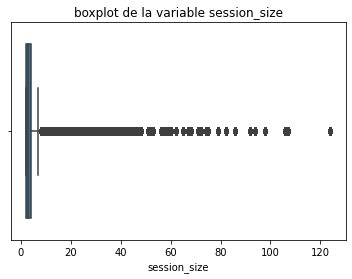

In [ ]:
sns.boxplot(all_clicks_df["session_size"])
plt.title("boxplot de la variable session_size")
plt.show()

In [ ]:
all_clicks_df["session_size"].min(), all_clicks_df["session_size"].max(), all_clicks_df["session_size"].mean()

(2, 124, 3.9018851267711026)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


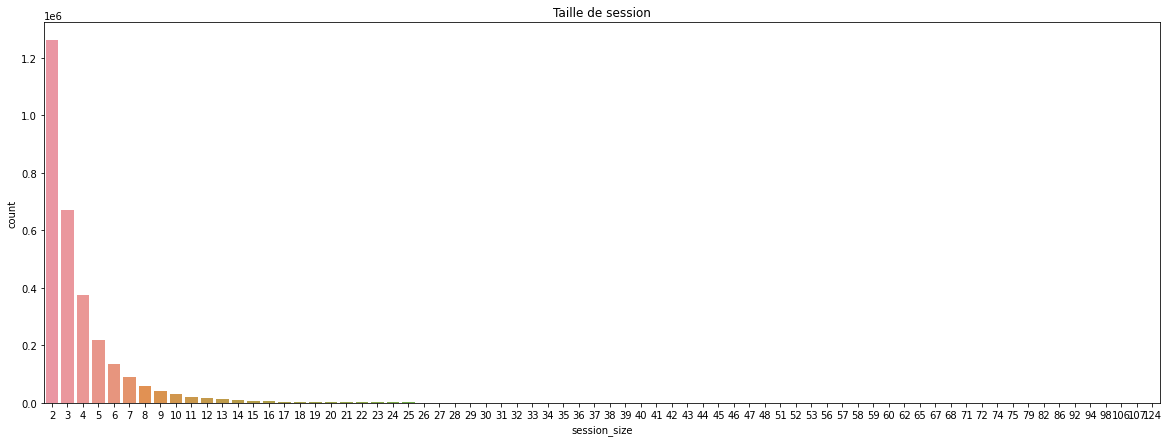

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(20,7))
sns.countplot(all_clicks_df["session_size"])
plt.title("Taille de session")
fig.savefig(figure_path + 'session_size_all.png')
plt.show()

#### La variable **"click_article_id"**

In [ ]:
var = "click_article_id"
all_clicks_df[var].nunique()

46033

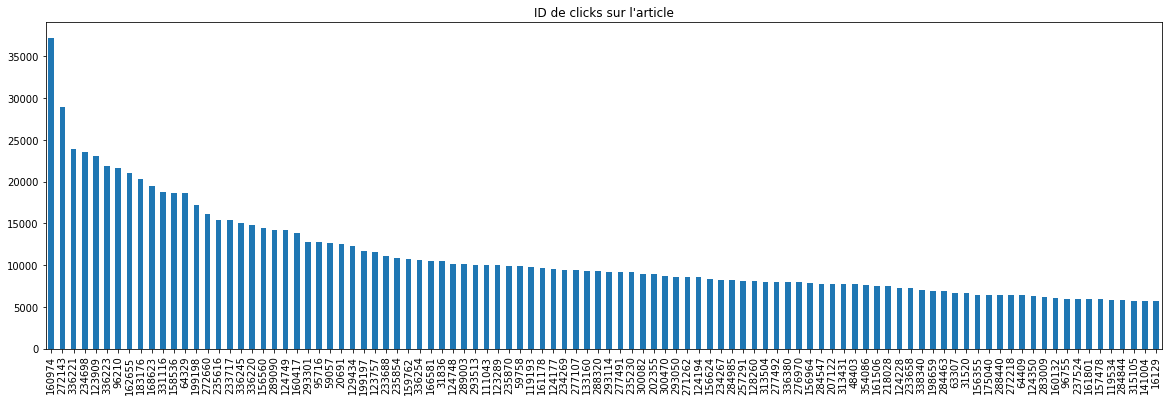

In [ ]:
var = "click_article_id"
fig = plt.figure(figsize=(20,6))
all_clicks_df[var].value_counts()[:100].plot.bar()
plt.title('ID de clicks sur l\'article')
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"click_timestamp"**

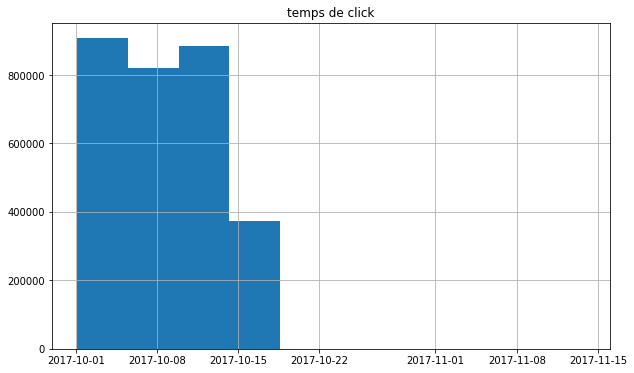

In [ ]:
var = "click_timestamp"
fig = plt.figure(figsize=(10,6))
all_clicks_df[var] = pd.to_datetime(all_clicks_df[var], unit='ms')
all_clicks_df[var].hist()
plt.title('temps de click')
fig.savefig(figure_path + var + '_all.png')
plt.show()

In [ ]:
all_clicks_df[var].describe(datetime_is_numeric=True)

count                          2988181
mean     2017-10-08 14:51:05.606100736
min         2017-10-01 03:00:00.026000
25%      2017-10-04 14:20:52.854000128
50%      2017-10-08 20:35:30.480999936
75%      2017-10-11 19:43:24.600999936
max         2017-11-13 20:04:14.886000
Name: click_timestamp, dtype: object

#### La variable **"click_environment"**

In [ ]:
var = "click_environment"
all_clicks_df[var].describe()

count     2988181
unique          3
top             4
freq      2904478
Name: click_environment, dtype: int64

In [ ]:
var = "click_environment"
all_clicks_df[var].unique()

array([4, 2, 1], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


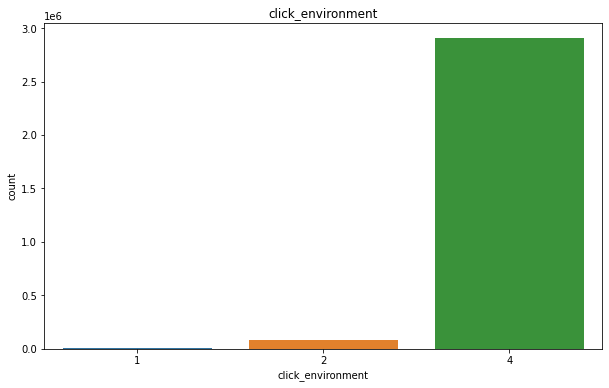

In [ ]:
var = "click_environment"
fig = plt.figure(figsize=(10,6))
sns.countplot(all_clicks_df[var])
plt.title(var)
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"click_deviceGroup"**

In [ ]:
var = "click_deviceGroup"
all_clicks_df[var].describe()

count     2988181
unique          5
top             1
freq      1823162
Name: click_deviceGroup, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


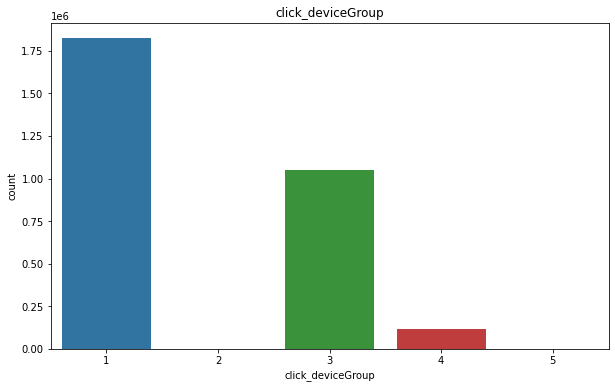

In [ ]:
var = "click_deviceGroup"
fig = plt.figure(figsize=(10,6))
sns.countplot(all_clicks_df[var])
plt.title(var)
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"click_os"**

In [ ]:
var = "click_os"
all_clicks_df[var].unique()

array([2, 17, 20, 12, 13, 19, 3, 5], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


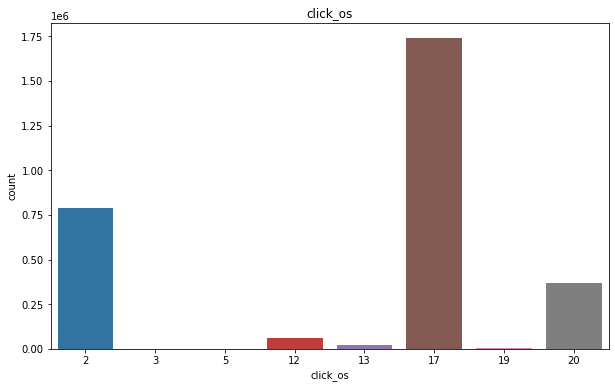

In [ ]:
var = "click_os"
fig = plt.figure(figsize=(10,6))
sns.countplot(all_clicks_df[var])
plt.title(var)
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"click_country"**

In [ ]:
var = "click_country"
all_clicks_df[var].unique()

array([1, 10, 11, 3, 8, 6, 4, 5, 9, 7, 2], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


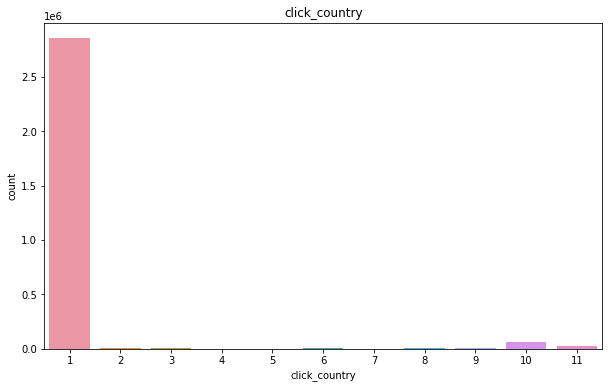

In [ ]:
var = "click_country"
fig = plt.figure(figsize=(10,6))
sns.countplot(all_clicks_df[var])
plt.title(var)
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"click_region"**

In [ ]:
var = "click_region"
all_clicks_df[var].unique()

array([13, 7, 24, 28, 25, 21, 9, 27, 16, 20, 19, 8, 5, 2, 3, 4, 14, 12,
       17, 6, 22, 26, 15, 1, 10, 18, 11, 23], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


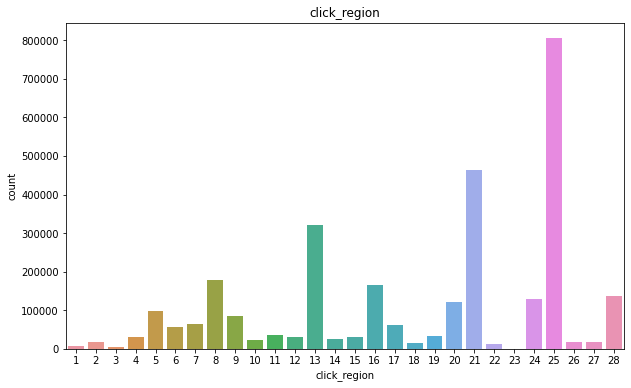

In [ ]:
var = "click_region"
fig = plt.figure(figsize=(10,6))
sns.countplot(all_clicks_df[var])
plt.title(var)
fig.savefig(figure_path + var + '_all.png')
plt.show()

#### La variable **"click_referrer_type"**

In [ ]:
var = "click_referrer_type"
all_clicks_df[var].unique()

array([1, 2, 7, 5, 6, 4, 3], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


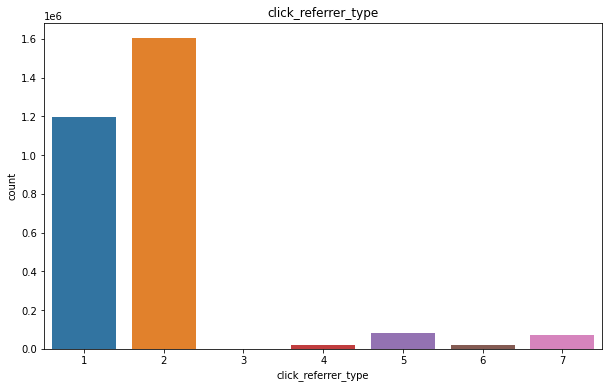

In [ ]:
var = "click_referrer_type"
fig = plt.figure(figsize=(10,6))
sns.countplot(all_clicks_df[var])
plt.title(var)
fig.savefig(figure_path + var + '.png')
plt.show()

#### Nombre de clicks par user

In [ ]:
var = "user_id"
agg_user = all_clicks_df.groupby(var).agg(n_clicks_user = (var,"count"),
                                          session_size_max = ("session_size","max"))
agg_user.head()

,n_clicks_user,session_size_max
user_id,,
0,8,2
1,12,2
2,4,2
3,17,4
4,7,3


In [ ]:
agg_user.describe()

,n_clicks_user,session_size_max
count,322897.000000,322897.000000
mean,9.254285,3.266156
std,14.946358,2.147438
min,2.000000,2.000000
25%,2.000000,2.000000
50%,4.000000,3.000000
75%,10.000000,4.000000
max,1232.000000,124.000000


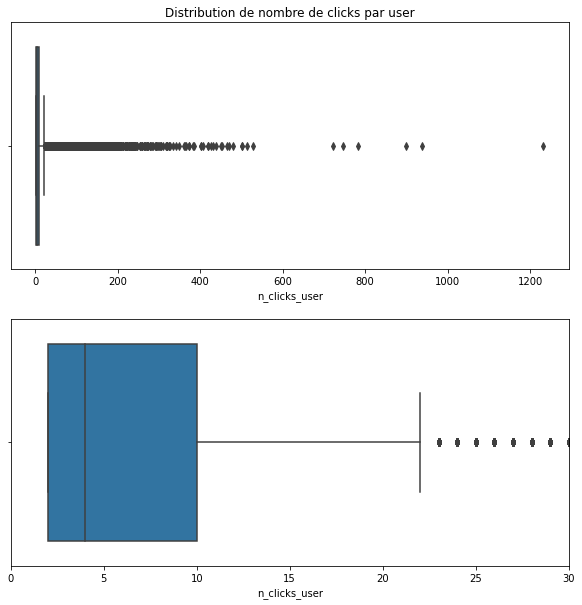

In [ ]:
var = 'n_clicks_user'
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(data = agg_user, x = var)
plt.title('Distribution de nombre de clicks par user')
plt.subplot(212)
sns.boxplot(data = agg_user, x = var)
plt.xlim(0,30)
fig.savefig(figure_path + var + '.png')
plt.show()

#### Nombre de clicks sur un article

In [ ]:
var = "click_article_id"
agg_article = all_clicks_df.groupby(var).agg(n_clicks_article = (var,"count"))
agg_article.head()

,n_clicks_article
click_article_id,
3,1
27,1
69,1
81,2
84,1


In [ ]:
agg_article.describe()

,n_clicks_article
count,46033.000000
mean,64.913888
std,629.322888
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,37213.000000


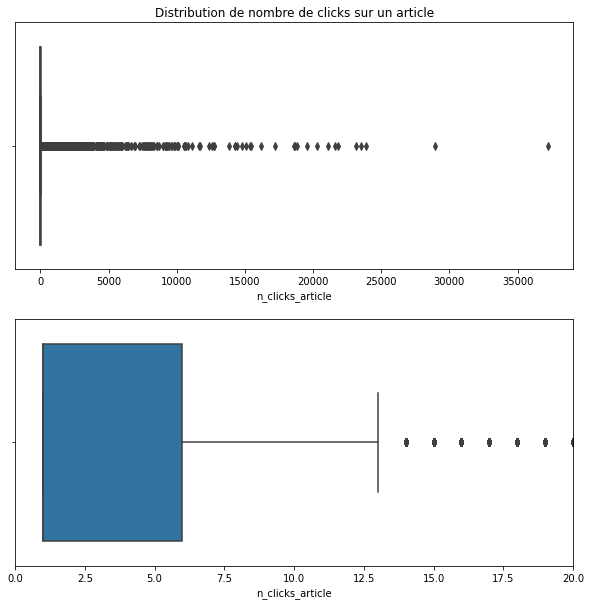

In [ ]:
var = 'n_clicks_article'
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(data = agg_article, x = var)
plt.title('Distribution de nombre de clicks sur un article')
plt.subplot(212)
sns.boxplot(data = agg_article, x = var)
plt.xlim(0,20)
fig.savefig(figure_path + var + '.png')
plt.show()

#### Nombre de clicks par user sur un article

In [ ]:
var1 = "user_id"
var2 = "click_article_id"
agg_user_article = all_clicks_df.groupby([var1, var2], as_index=False).agg(n_clicks_user_article = ("user_id","count"))
agg_user_article.head()

,user_id,click_article_id,n_clicks_user_article
0,0,68866,1
1,0,87205,1
2,0,87224,1
3,0,96755,1
4,0,157541,1


In [ ]:
agg_user_article['n_clicks_user_article'].describe()

count    2.950710e+06
mean     1.012699e+00
std      1.344699e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.300000e+01
Name: n_clicks_user_article, dtype: float64

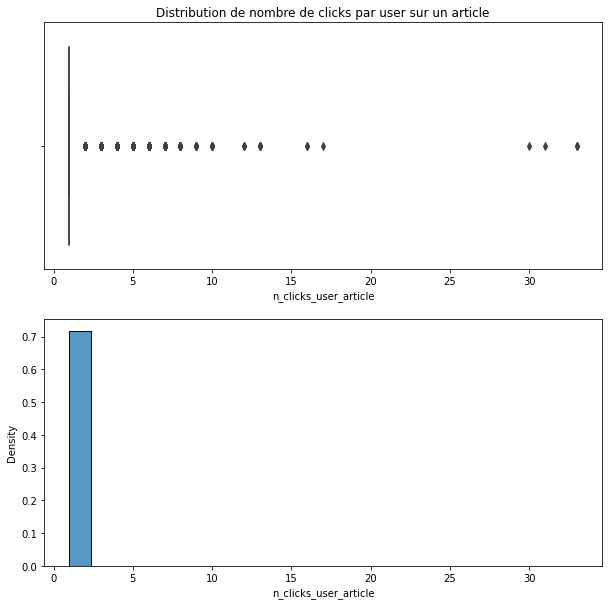

In [ ]:
var = 'n_clicks_user_article'
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(data = agg_user_article, x = var)
plt.title('Distribution de nombre de clicks par user sur un article')
plt.subplot(212)
sns.histplot(data = agg_user_article, x = var, stat="density")
fig.savefig(figure_path + var + '.png')
plt.show()

#### Nombre de clicks par user sur un article normalisé

In [ ]:
merge_user_article = agg_user_article.merge(agg_user, on = 'user_id')
merge_user_article.head()

,user_id,click_article_id,n_clicks_user_article,n_clicks_user,session_size_max
0,0,68866,1,8,2
1,0,87205,1,8,2
2,0,87224,1,8,2
3,0,96755,1,8,2
4,0,157541,1,8,2


In [ ]:
merge_user_article[["n_clicks_user_article", "n_clicks_user", 	"session_size_max"]].describe()

,n_clicks_user_article,n_clicks_user,session_size_max
count,2.950710e+06,2.950710e+06,2.950710e+06
mean,1.012699e+00,3.264312e+01,5.812462e+00
std,1.344699e-01,5.677744e+01,5.800024e+00
min,1.000000e+00,2.000000e+00,2.000000e+00
25%,1.000000e+00,8.000000e+00,3.000000e+00
50%,1.000000e+00,1.700000e+01,4.000000e+00
75%,1.000000e+00,3.800000e+01,7.000000e+00
max,3.300000e+01,1.232000e+03,1.240000e+02


In [ ]:
merge_user_article.shape

(2950710, 5)

In [ ]:
merge_user_article['n_clicks_by_session_size'] = merge_user_article['n_clicks_user_article']/merge_user_article['session_size_max']
merge_user_article['n_clicks_by_n_clicks_user'] = merge_user_article['n_clicks_user_article']/merge_user_article['n_clicks_user']
merge_user_article['n_clicks_by_n_clicks_user_session_size'] = merge_user_article['n_clicks_user_article']/(merge_user_article['n_clicks_user']*merge_user_article['session_size_max'])

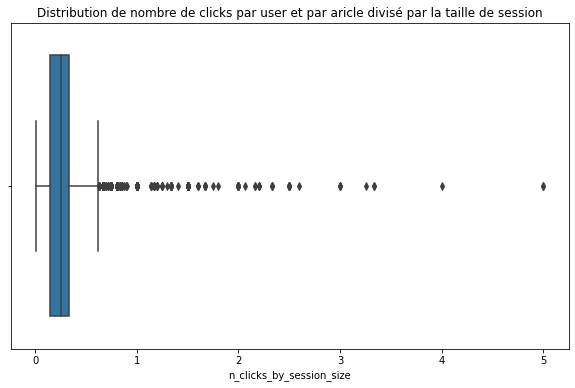

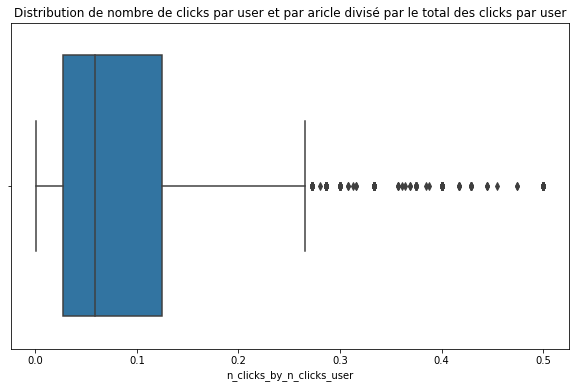

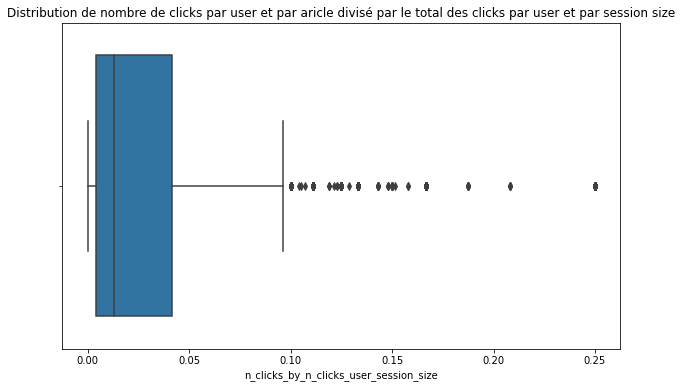

In [ ]:
var1 = 'n_clicks_by_session_size'
var2 = 'n_clicks_by_n_clicks_user'
var3 = 'n_clicks_by_n_clicks_user_session_size'
fig = plt.figure(figsize=(10,6))
sns.boxplot(data = merge_user_article, x = var1)
plt.title('Distribution de nombre de clicks par user et par aricle divisé par la taille de session')
fig.savefig(figure_path + var1 + '.png')
plt.show()

fig = plt.figure(figsize=(10,6))
sns.boxplot(data = merge_user_article, x = var2)
plt.title('Distribution de nombre de clicks par user et par aricle divisé par le total des clicks par user')
fig.savefig(figure_path + var2 + '.png')
plt.show()

fig = plt.figure(figsize=(10,6))
sns.boxplot(data = merge_user_article, x = var3)
plt.title('Distribution de nombre de clicks par user et par aricle divisé par le total des clicks par user et par session size')
fig.savefig(figure_path + var3 + '.png')
plt.show()

In [ ]:
merge_user_article.iloc[:,2:].describe()

,n_clicks_user_article,n_clicks_user,session_size_max,n_clicks_by_session_size,n_clicks_by_n_clicks_user,n_clicks_by_n_clicks_user_session_size
count,2.950710e+06,2.950710e+06,2.950710e+06,2.950710e+06,2.950710e+06,2.950710e+06
mean,1.012699e+00,3.264312e+01,5.812462e+00,2.572044e-01,1.094303e-01,4.105156e-02
std,1.344699e-01,5.677744e+01,5.800024e+00,1.383381e-01,1.295019e-01,6.516995e-02
min,1.000000e+00,2.000000e+00,2.000000e+00,8.064516e-03,8.116883e-04,8.588409e-06
25%,1.000000e+00,8.000000e+00,3.000000e+00,1.428571e-01,2.702703e-02,4.166667e-03
50%,1.000000e+00,1.700000e+01,4.000000e+00,2.500000e-01,5.882353e-02,1.315789e-02
75%,1.000000e+00,3.800000e+01,7.000000e+00,3.333333e-01,1.250000e-01,4.166667e-02
max,3.300000e+01,1.232000e+03,1.240000e+02,5.000000e+00,5.000000e-01,2.500000e-01


In [ ]:
path = "/content/drive/MyDrive/projet9/data/"
merge_user_article.to_csv(path + 'merge_user_article.csv', index=False)

#### Résumé
  - L'ensemble des fichiers dans le dossier clicks contients la description de **2 988 181** clicks sur les articles
  - Les clicks provenant de **322 897** utilisateurs
  - On dispose de la **taille de session**, la **date de début de session** ainsi que l'**id de l'article** sur lequel le user a cliqué
  - **46 033** articles ont été cliqué dessus
  - Chaque user fait en moyenne **9 clicks**
  - **Plus que la moitié** des articles ont été visité seulement** une fois** et **75%** des articles ont été visités **6 fois** maximum
  - **0.75 des articles** ont été visités **une fois** par un utilisateur


### Exploration du fichier 'articles_embeddings.pickle'

Ce fichier contient les incorporations du contenu d'article (vecteur de taille 250)

In [ ]:
articles_embeddings.shape

(364047, 250)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(articles_embeddings)
articles_embeddings_reduced = pca.transform(articles_embeddings)

In [ ]:
articles_embeddings_df = pd.concat([articles_meta[["article_id", "category_id"]], pd.DataFrame(articles_embeddings_reduced)], axis=1)

In [ ]:
from sklearn.manifold import TSNE

n_samples = 10000
df_reduced = articles_embeddings_df.sample(n_samples)
tsne = TSNE(n_components = 2,
            perplexity = 30,
            n_iter = 1000)

x_tsne = tsne.fit_transform(df_reduced.iloc[:, 2:])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
df_tsne = pd.DataFrame(x_tsne, columns=['tsne1', 'tsne2'], index = df_reduced.index)
df_tsne_cat = pd.concat([df_tsne, df_reduced['category_id']], axis=1)
df_tsne_cat.head()

,tsne1,tsne2,category_id
316793,41.541462,49.120041,432
182596,-28.574839,46.258442,301
177486,-0.603606,41.199936,300
339165,35.304928,41.164726,438
236269,67.389114,-15.548028,375


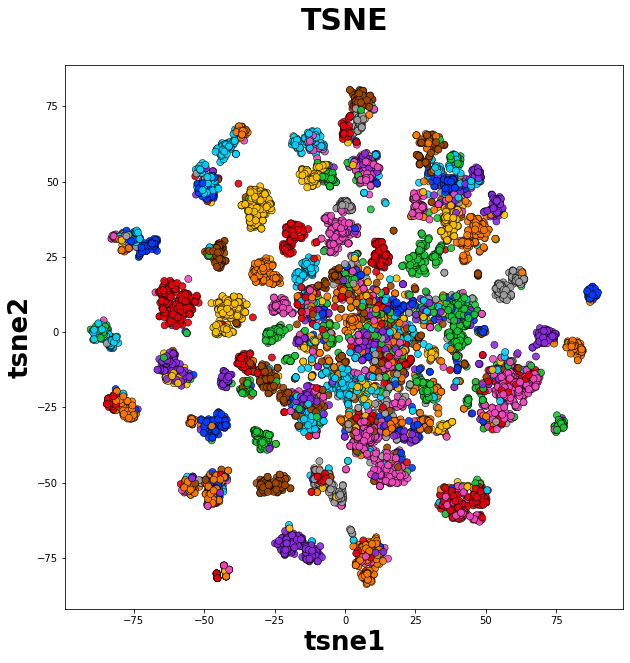

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = df_tsne_cat,
                x = "tsne1", 
                y = "tsne2",
                hue = "category_id",
                palette = "bright",
                s = 50, 
                alpha = 0.9, 
                legend = None,
                edgecolor="black")

plt.title('TSNE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold') 

plt.show()